# Feature Exploration

In this notebook, we will plot some features that we can extract with `py_neuromodulation` over time, as well as present some examples of correlation plots. Again, we'll load already processed data.

In [1]:
import os
import sys

# change root directory of the project
SCRIPT_DIR = os.path.dirname(os.path.abspath(''))
if os.path.basename(SCRIPT_DIR) == "py_neuromodulation":
    # this check is necessary, so we can also run the script from the root directory
    SCRIPT_DIR = os.path.join(SCRIPT_DIR, "examples")

sys.path.append(os.path.dirname(SCRIPT_DIR))

# Reload imports to get changes in other scripts
%load_ext autoreload
%autoreload 2

In [2]:
import py_neuromodulation as nm
from py_neuromodulation import (
    nm_analysis,
    nm_plots,
)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
sub = "testsub"
ses = "EphysMedOff"
task = "buttonpress"
run = 0
datatype = "ieeg"

RUN_NAME = f"sub-{sub}_ses-{ses}_task-{task}_run-{run}"

PATH_RUN = os.path.join(
    (os.path.join(SCRIPT_DIR, "data")),
    f"sub-{sub}",
    f"ses-{ses}",
    datatype,
    RUN_NAME,
)
PATH_BIDS = os.path.join(SCRIPT_DIR, "data")

# Provide a path for the output data.
PATH_OUT = os.path.join(SCRIPT_DIR, "data", "derivatives")

In [4]:
# init analyzer
feature_reader = nm_analysis.Feature_Reader(
    feature_dir=PATH_OUT, feature_file=RUN_NAME
)

# Plot power spectra features, and other feature modalities, over time.


In [5]:
feature_reader.feature_arr.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,556.867448,1.062234,0.993621,0.943920,0.928492,0.852230,0.700516,0.485655,0.458538,0.429905,...,0.787498,0.825906,0.807649,0.823140,0.839660,0.875233,1.044616,1.018915,1.285753,1.539734
ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,0.097928,0.097870,0.101644,0.101334,0.102008,0.105832,0.115610,0.139348,0.145471,0.149273,...,0.141883,0.139187,0.139578,0.137808,0.133944,0.133092,0.122830,0.123291,0.109791,0.096855
ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,12.191996,12.082133,11.731426,12.208543,12.168375,11.595645,10.853060,9.157952,8.705997,8.503853,...,8.241083,8.438267,8.520615,8.531605,8.693385,8.692532,9.221154,9.360012,10.225929,12.085410
ECOG_L_2_SMC_AT-avgref_RawHjorth_Activity,410.068736,1.017479,0.889153,0.850664,0.803110,0.790611,0.641237,0.618821,0.461187,0.421620,...,1.038645,1.050837,0.997429,0.996432,1.094325,1.149295,1.267092,1.278223,1.464549,1.586506
ECOG_L_2_SMC_AT-avgref_RawHjorth_Mobility,0.080716,0.083079,0.088917,0.084904,0.085282,0.087086,0.090452,0.092323,0.105248,0.110729,...,0.113596,0.113133,0.111957,0.112108,0.106548,0.106224,0.100112,0.097316,0.092781,0.078075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gridsubcortex_879_Sharpwave_Mean_decay_steepness_range_5_30,0.410140,0.049244,0.047675,0.052909,0.053993,0.054926,0.059110,0.061227,0.064645,0.061550,...,0.035951,0.036019,0.034514,0.032334,0.032279,0.033320,0.033532,0.034759,0.037323,0.035598
gridsubcortex_891_Sharpwave_Mean_decay_steepness_range_5_30,0.294656,0.054404,0.053485,0.060377,0.062839,0.063696,0.069115,0.072036,0.076979,0.072494,...,0.039146,0.038698,0.035500,0.031954,0.031140,0.033679,0.034479,0.036030,0.039232,0.036904
gridsubcortex_1082_Sharpwave_Mean_decay_steepness_range_5_30,0.690039,0.038060,0.034858,0.035887,0.033775,0.034216,0.035105,0.035515,0.033829,0.035278,...,0.028100,0.029647,0.031380,0.032721,0.034132,0.032613,0.031743,0.031597,0.031746,0.032788
time,1000.000000,1100.000000,1200.000000,1300.000000,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,...,17000.000000,17100.000000,17200.000000,17300.000000,17400.000000,17500.000000,17600.000000,17700.000000,17800.000000,17900.000000


### First we want to plot FFT for channel the first ECoG channel

In [6]:
# We take channel ch0 and plot all fft
ch_used = feature_reader.nm_channels.query(
    '(type=="ecog") and (used == 1)'
).iloc[0]["name"]

ch_cols = [f_ for f_ in feature_reader.feature_arr.columns if ch_used in f_]
filtered_df = feature_reader.feature_arr[ch_cols].filter(like='fft')

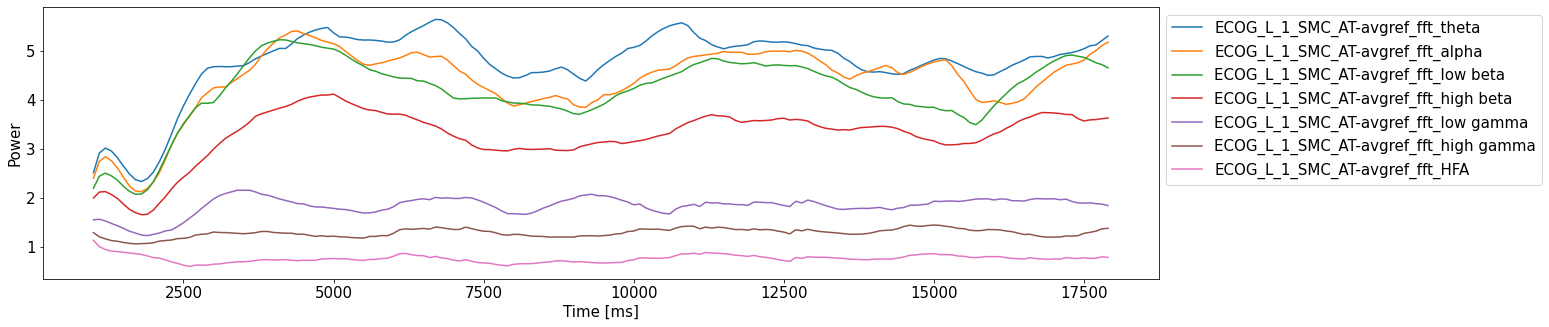

In [7]:
# The simulated time was 60 seconds
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        filtered_df)
plt.legend(
        list(filtered_df.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Power", fontsize = 15)
# plt.xlim([0,5500])
# plt.ylim([-1,2.5])
ax.tick_params(labelsize=15)
plt.show()

### Plot the Hjorth Parameters for All Channels over Time

Hjorth parameters are indicators of statistical properties used in signal processing in the time domain introduced by Bo Hjorth in 1970. The parameters are Activity, Mobility, and Complexity. [1-2] These three parameters will together characterize the signal in terms of amplitude, time scale and complexity.

#### Start with Hjorth Activity

Activity, giving a measure of the squared standard deviation of the amplitude, sometimes referred to as the variance or mean power.

In [8]:
df_hjorth_act = feature_reader.feature_arr.filter(like='Hjorth_Activity')

In [9]:
df_hjorth_act.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,556.867448,1.062234,0.993621,0.943920,0.928492,0.852230,0.700516,0.485655,0.458538,0.429905,...,0.787498,0.825906,0.807649,0.823140,0.839660,0.875233,1.044616,1.018915,1.285753,1.539734
ECOG_L_2_SMC_AT-avgref_RawHjorth_Activity,410.068736,1.017479,0.889153,0.850664,0.803110,0.790611,0.641237,0.618821,0.461187,0.421620,...,1.038645,1.050837,0.997429,0.996432,1.094325,1.149295,1.267092,1.278223,1.464549,1.586506
ECOG_L_3_SMC_AT-avgref_RawHjorth_Activity,600.402485,0.944052,0.874833,0.870260,0.822024,0.832180,0.796620,0.780564,0.550527,0.507921,...,0.873751,0.889439,0.877607,0.887340,0.907358,0.957074,0.969775,1.024813,1.098804,0.991034
ECOG_L_4_SMC_AT-avgref_RawHjorth_Activity,503.189871,0.821331,0.823409,0.823434,0.873046,0.939437,0.985315,0.708799,0.509551,0.545225,...,0.856037,0.931669,0.903529,0.896039,0.899681,0.874387,0.915587,0.951011,1.126055,1.165965
ECOG_L_5_SMC_AT-avgref_RawHjorth_Activity,895.614714,0.983695,0.851155,0.755893,0.600757,0.557154,0.422134,0.420873,0.399997,0.361039,...,0.276977,0.279957,0.267810,0.249651,0.239979,0.247290,0.271082,0.279830,0.273690,0.296173
ECOG_L_6_SMC_AT-avgref_RawHjorth_Activity,4313.293214,0.994626,1.022902,0.952909,0.985528,1.012251,0.978123,0.771816,0.559999,0.550565,...,0.849745,0.906540,0.890459,0.917008,0.934828,0.941506,0.996043,0.994053,1.129762,1.347643
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Activity,192.683861,1.076811,1.115501,1.104935,1.081036,1.170955,1.209000,1.203075,1.062241,1.048445,...,0.535439,0.423607,0.428233,0.514327,0.493603,0.472654,0.293095,0.262077,0.263113,0.274608
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Activity,224.785120,1.097163,1.144308,1.129654,1.120456,1.199013,1.207580,1.141731,1.038685,1.035371,...,0.339558,0.248438,0.309239,0.335383,0.331441,0.333258,0.302663,0.303810,0.275248,0.293103
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Activity,26.441843,1.059556,1.117009,1.148922,1.206893,1.147438,0.836982,0.659995,0.608359,0.692908,...,1.258982,1.643149,2.316765,2.500891,2.406587,2.076263,1.376156,0.854586,0.493813,0.373156
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Activity,51.114474,1.048114,0.997769,1.006682,0.998527,1.059913,1.089718,1.114964,1.205493,1.231761,...,0.914805,0.725553,0.685628,0.677295,0.473730,0.559002,0.560362,0.550213,0.559046,0.606534


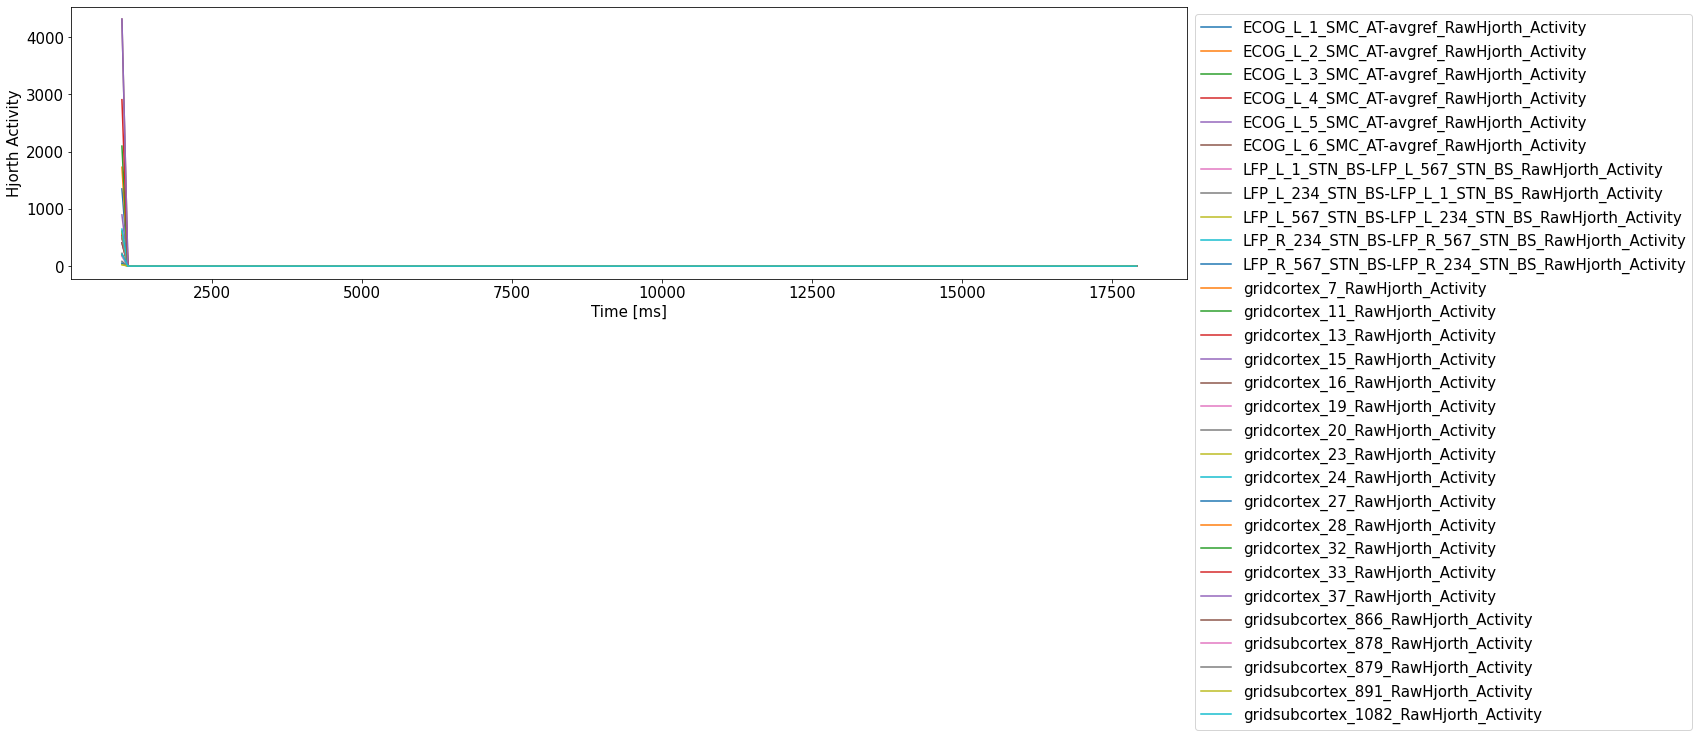

In [10]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_act)
plt.legend(
        list(df_hjorth_act.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

# Question: WHY DOES THIS HAPPEN?
__ZOOMING IN THE PLOT ABOVE__

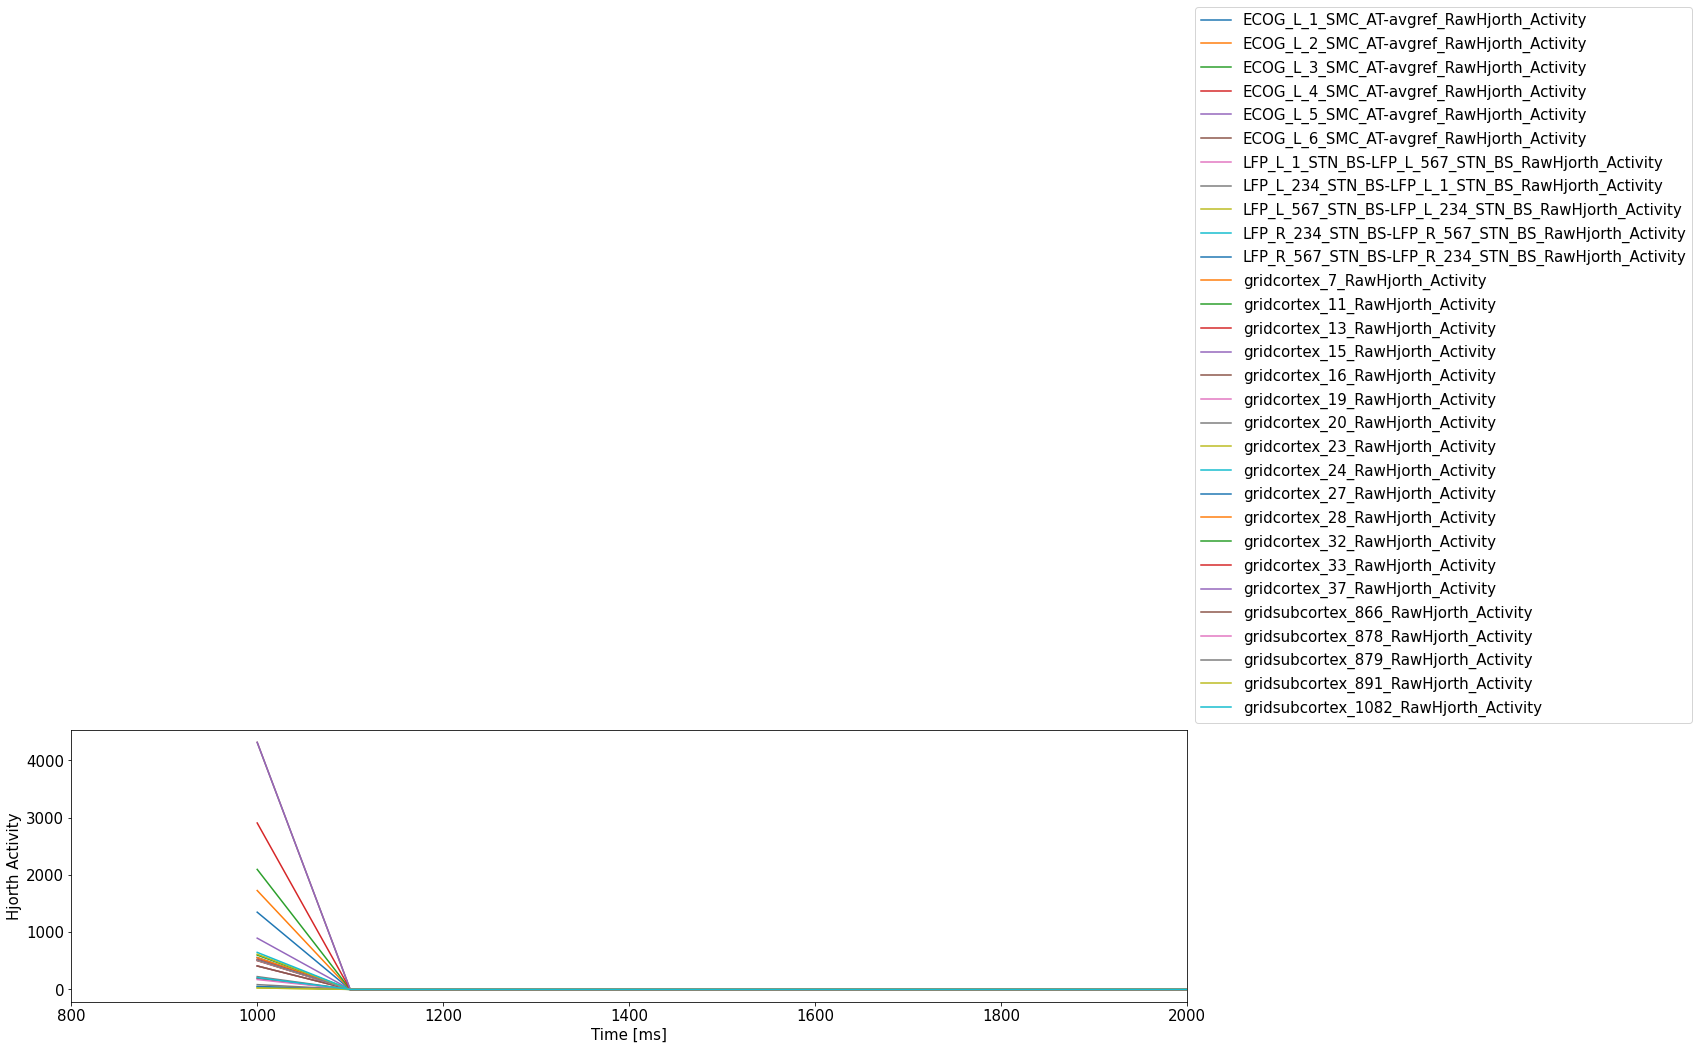

In [11]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_act)
plt.legend(
        list(df_hjorth_act.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.xlim(800,2000)
plt.show()

#### Hjorth Mobility
Mobility, giving a measure of the standard deviation of the slope with reference to the standard deviation of the amplitude. It is expressed as a ratio per time unit and may be conceived also as a mean frequency.

In [12]:
df_hjorth_mob = feature_reader.feature_arr.filter(like='Hjorth_Mobility')

In [13]:
df_hjorth_mob.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,0.097928,0.097870,0.101644,0.101334,0.102008,0.105832,0.115610,0.139348,0.145471,0.149273,...,0.141883,0.139187,0.139578,0.137808,0.133944,0.133092,0.122830,0.123291,0.109791,0.096855
ECOG_L_2_SMC_AT-avgref_RawHjorth_Mobility,0.080716,0.083079,0.088917,0.084904,0.085282,0.087086,0.090452,0.092323,0.105248,0.110729,...,0.113596,0.113133,0.111957,0.112108,0.106548,0.106224,0.100112,0.097316,0.092781,0.078075
ECOG_L_3_SMC_AT-avgref_RawHjorth_Mobility,0.071561,0.074592,0.076260,0.071123,0.074939,0.074592,0.073720,0.074287,0.087132,0.090043,...,0.108929,0.106815,0.105101,0.104396,0.103217,0.101492,0.100324,0.098911,0.098358,0.086598
ECOG_L_4_SMC_AT-avgref_RawHjorth_Mobility,0.074349,0.079059,0.079253,0.074211,0.071675,0.069674,0.068128,0.079375,0.094224,0.090879,...,0.120312,0.116521,0.114201,0.113825,0.113074,0.113702,0.113621,0.114398,0.108326,0.092896
ECOG_L_5_SMC_AT-avgref_RawHjorth_Mobility,0.068921,0.069115,0.073505,0.076997,0.084111,0.086782,0.095614,0.096732,0.100138,0.104510,...,0.109378,0.108992,0.110087,0.112951,0.111815,0.109786,0.107669,0.106447,0.105080,0.099146
ECOG_L_6_SMC_AT-avgref_RawHjorth_Mobility,0.074957,0.077186,0.076114,0.067883,0.067542,0.068262,0.066502,0.074117,0.085679,0.085256,...,0.106674,0.104351,0.101342,0.099825,0.097314,0.096701,0.093904,0.094093,0.090204,0.070022
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Mobility,0.204429,0.161248,0.149917,0.151631,0.151144,0.143473,0.143377,0.143914,0.153746,0.147863,...,0.184329,0.208583,0.205246,0.185300,0.186700,0.191953,0.242205,0.258549,0.257592,0.251133
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Mobility,0.198824,0.154394,0.144478,0.146518,0.145350,0.140743,0.142123,0.146452,0.155837,0.152429,...,0.257566,0.304185,0.270080,0.255699,0.256623,0.253380,0.265144,0.266238,0.280539,0.272603
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Mobility,0.295503,0.292221,0.288685,0.286553,0.281765,0.298650,0.351879,0.403936,0.432016,0.387314,...,0.222484,0.190953,0.155603,0.147149,0.148219,0.159370,0.195810,0.249324,0.327185,0.366923
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Mobility,0.307995,0.296107,0.305020,0.300227,0.285404,0.263445,0.261755,0.253357,0.244464,0.238810,...,0.223574,0.252791,0.258835,0.260379,0.315869,0.288499,0.286151,0.288414,0.287952,0.277276


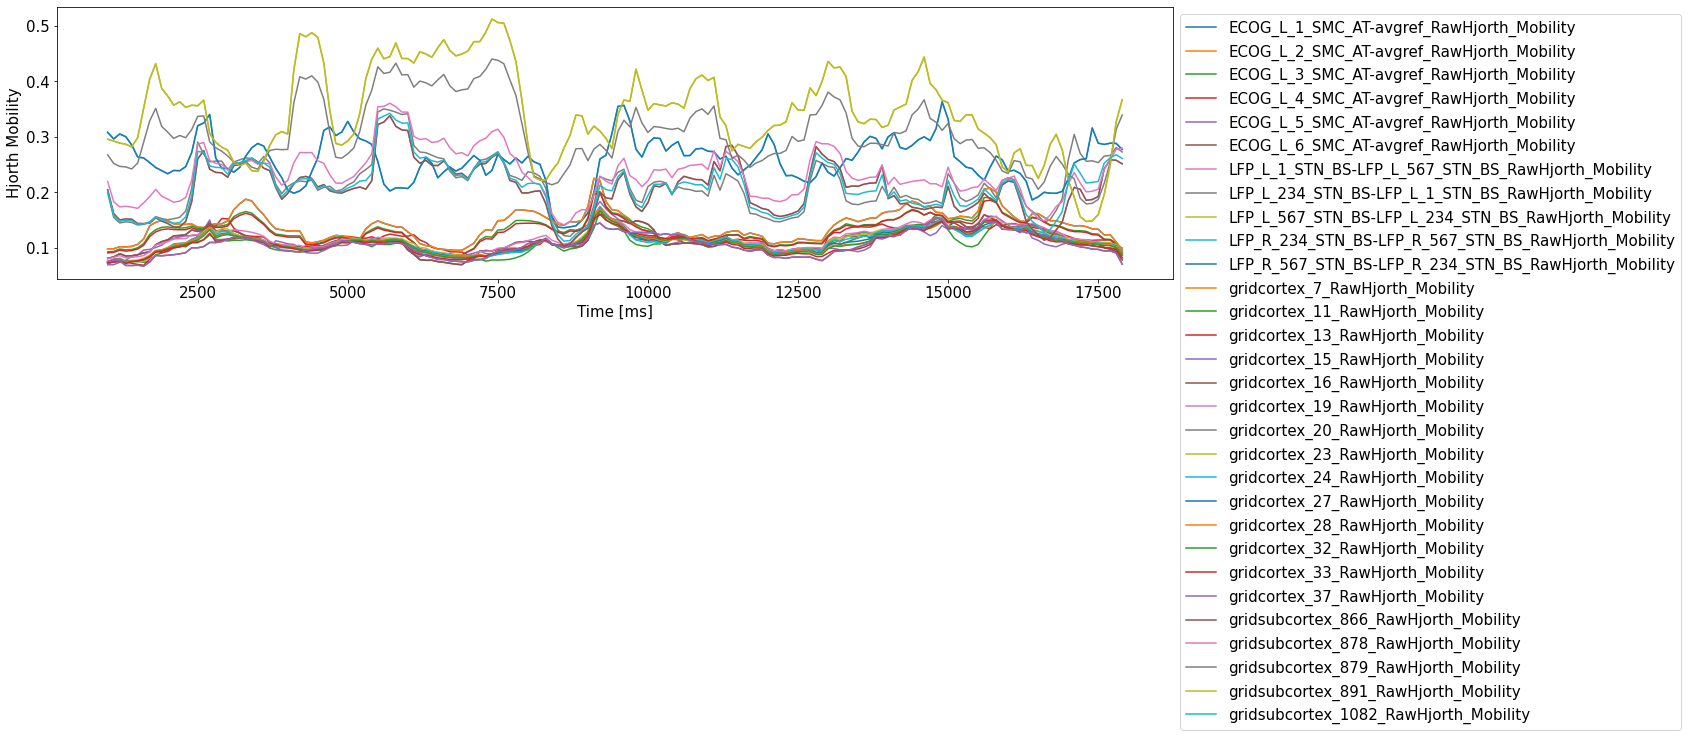

In [14]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_mob)
plt.legend(
        list(df_hjorth_mob.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Mobility", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

#### Hjorth Complexity
Complexity, giving a measure of excessive details with reference to the “softest” possible curve shape, th sine wave, this corresponding to unity. It is expressed as the number of standard slopes actually generated during the average time required for generation of one standard amplitude as given by the mobility. Due to the non-linear calculation of standard deviation this parameter will quantify any deviation from the sine shape as an increase from unity

In [15]:
df_hjorth_com = feature_reader.feature_arr.filter(like='Hjorth_Complexity')

In [16]:
df_hjorth_com.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,12.191996,12.082133,11.731426,12.208543,12.168375,11.595645,10.853060,9.157952,8.705997,8.503853,...,8.241083,8.438267,8.520615,8.531605,8.693385,8.692532,9.221154,9.360012,10.225929,12.085410
ECOG_L_2_SMC_AT-avgref_RawHjorth_Complexity,11.489600,11.023094,10.647214,11.928959,11.852182,11.469901,11.701744,11.626647,10.583590,10.247504,...,7.769815,7.902264,8.163990,8.048652,8.493507,8.442077,8.794558,9.303339,9.568133,12.700732
ECOG_L_3_SMC_AT-avgref_RawHjorth_Complexity,11.060957,10.750371,10.946863,13.071171,12.067703,12.026949,12.760770,12.800730,11.185010,11.209690,...,7.393487,7.534861,7.841801,7.903473,8.023214,8.090060,8.199837,8.230122,8.168551,10.542189
ECOG_L_4_SMC_AT-avgref_RawHjorth_Complexity,11.283918,11.311492,11.582129,13.100506,13.696865,13.711278,13.803563,12.024331,10.244817,10.797471,...,7.162669,7.405670,7.651999,7.767264,7.634759,7.815202,7.640441,7.437332,7.590137,9.562508
ECOG_L_5_SMC_AT-avgref_RawHjorth_Complexity,11.693642,11.870319,11.425191,10.926473,10.460403,10.186079,9.562733,9.467920,9.073842,8.716854,...,7.195262,7.250910,7.194232,7.048777,7.408267,7.446660,7.416651,7.436279,7.733161,8.429612
ECOG_L_6_SMC_AT-avgref_RawHjorth_Complexity,7.594804,7.435772,7.820343,10.089239,9.920922,9.243576,9.754475,8.940515,8.087036,8.285172,...,5.501517,5.642978,5.945278,6.038913,6.155851,6.208957,6.420602,6.362286,6.458268,8.978082
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Complexity,6.615024,8.393949,9.048984,8.904914,8.948840,9.540512,9.623653,9.674013,9.103961,9.515391,...,7.518434,6.624029,6.725405,7.475067,7.451854,7.231314,5.739156,5.363143,5.368834,5.466596
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Complexity,6.839337,8.816313,9.384925,9.207927,9.302725,9.695694,9.624327,9.472182,8.913249,9.155607,...,5.430946,4.570076,5.148636,5.459291,5.468111,5.515202,5.285877,5.230073,4.942047,5.081855
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Complexity,4.903570,4.965066,5.062699,5.141217,5.208581,4.911818,4.138340,3.582661,3.323619,3.691163,...,6.446600,7.492005,9.144839,9.714572,9.564981,8.932075,7.231389,5.729285,4.395006,3.925315
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Complexity,4.554805,4.758565,4.614181,4.670466,4.916148,5.316793,5.367716,5.575430,5.841898,5.940401,...,6.395367,5.679949,5.509737,5.465285,4.509879,4.942354,4.992916,4.939559,4.912072,5.076851


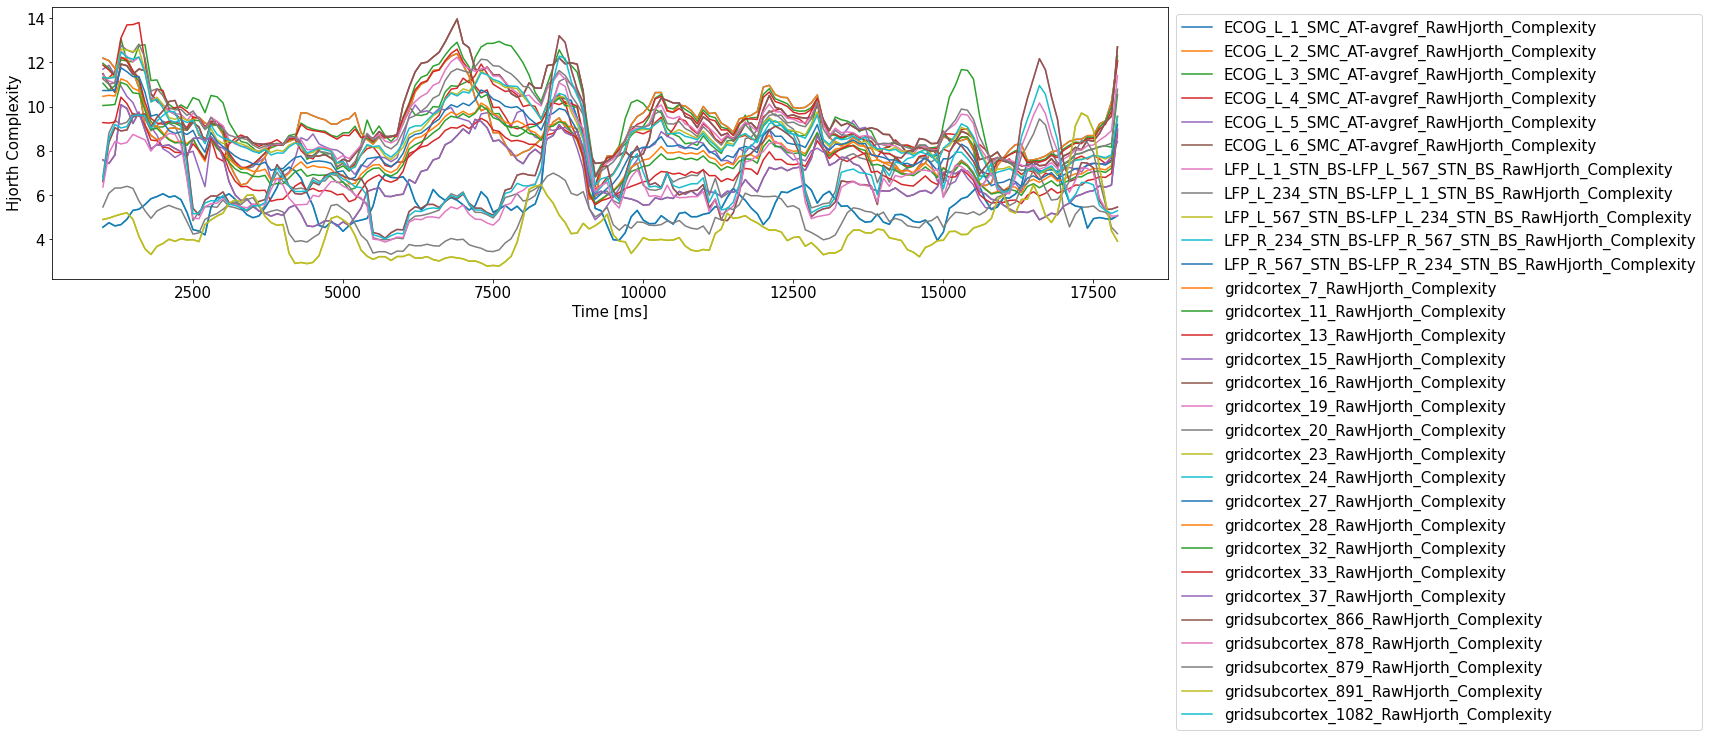

In [17]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_com)
plt.legend(
        list(df_hjorth_com.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Complexity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

## Feature correlation plot
In order to plot the features correlation matrix, we can use the function ```plot_corr_matrix``` from ```nm_plots```.
Since we have too many features, let's plot only the fft features from the ECoG channel ```'ECOG_L_1_SMC_AT```. There are a couple of different ways of doing it. The first one is by giving the whole dataframe as input, but giving a list of the ```feature_names``` we want to plot - those names should be exactly correspondent to the columns on the ```feature_reader.feature_arr``` dataframe.


Correlation matrix figure saved to /home/lauraflyra/Documents/BCCN/Lab_Rotation_DBS_Decoding/Code/py_neuromodulation/examples.png


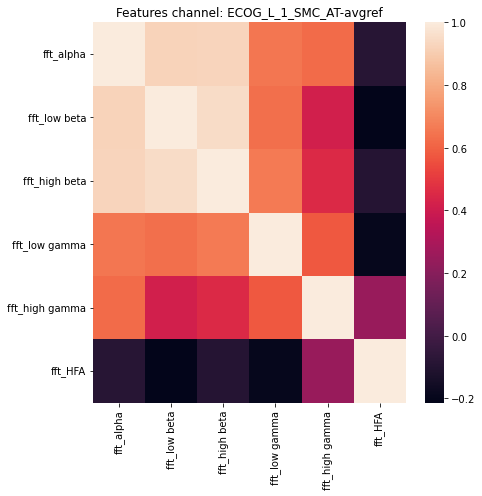

In [18]:
nm_plots.plot_corr_matrix(
        feature = feature_reader.feature_arr,
        feature_file=feature_reader.feature_file,
        ch_name='ECOG_L_1_SMC_AT-avgref',
        feature_names=["ECOG_L_1_SMC_AT-avgref_fft_alpha",
                    "ECOG_L_1_SMC_AT-avgref_fft_low beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_high beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_low gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_high gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_HFA"],
        show_plot=True,
)

Another way to plot it, is to filter the ```feature_reader.feature_arr``` dataframe by the columns that we want to plot. Notice the differences in the title and in the naming of the x and y ticks.

Correlation matrix figure saved to /home/lauraflyra/Documents/BCCN/Lab_Rotation_DBS_Decoding/Code/py_neuromodulation/examples.png


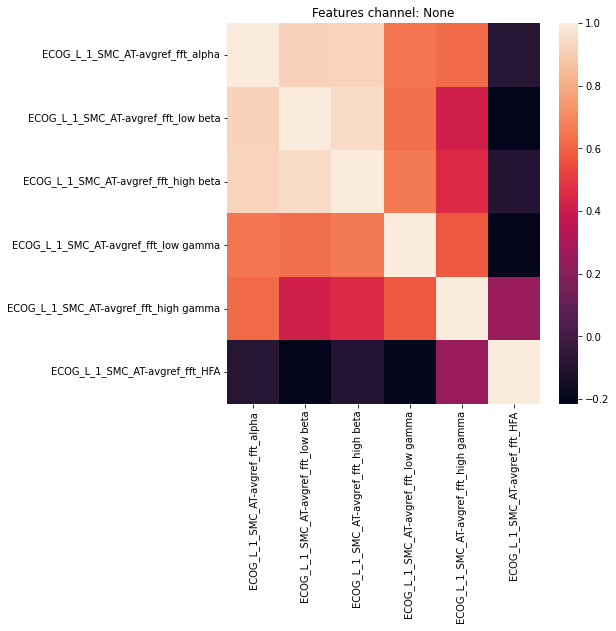

In [19]:
nm_plots.plot_corr_matrix(
        feature = feature_reader.feature_arr[["ECOG_L_1_SMC_AT-avgref_fft_alpha",
                    "ECOG_L_1_SMC_AT-avgref_fft_low beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_high beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_low gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_high gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_HFA"]],
        feature_file=feature_reader.feature_file,
        show_plot=True,
)

Normally, copying and pasting all the names might be too much work, so we can also use the `regex` parameter from `df.filter` as a way to filter for a specific channel. In the next cell, we plot all features that were computed with the data from electrode `ECOG_L_1_SMC_AT`.

Correlation matrix figure saved to /home/lauraflyra/Documents/BCCN/Lab_Rotation_DBS_Decoding/Code/py_neuromodulation/examples.png


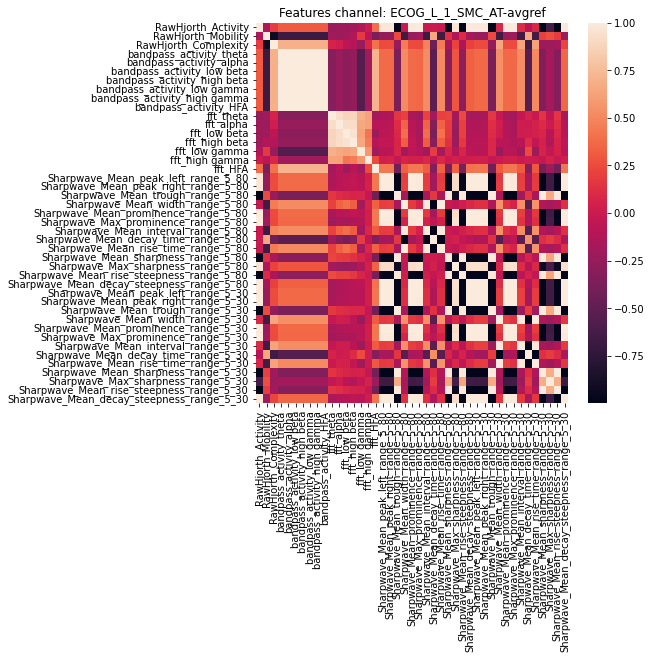

In [20]:
nm_plots.plot_corr_matrix(
        feature = feature_reader.feature_arr.filter(regex='ECOG_L_1_SMC_AT'),
        ch_name= 'ECOG_L_1_SMC_AT-avgref',
        feature_names=feature_reader.feature_arr.filter(regex='ECOG_L_1').columns,
        feature_file=feature_reader.feature_file,
        show_plot=True,
)

__References__
[1] Hjorth, Bo. “EEG Analysis Based on Time Domain Properties.” Electroencephalography and Clinical Neurophysiology 29, no. 3 (September 1, 1970): 306–10. https://doi.org/10.1016/0013-4694(70)90143-4.
[2] https://en.wikipedia.org/wiki/Hjorth_parameters

